In [ ]:
# trial for fft analysis

In [1]:
print("Loading Libraries...")
import os
import csv
import platform
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import dask.dataframe as dd
import math
import matplotlib.pyplot as plt
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [2]:
#Local
print("Loading directories..")
#path_data = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01'
#path_post = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post'
path_acu = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/acu'
#path_plots = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/plots'
path_signal = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/signal'
path_rms = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/rms'
valid = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/valid'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [ ]:
#PUT Workstation
print("Loading directories..") 
#path_data = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01'
#path_post = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post'
path_acu = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/acu'
#path_plots = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/plots'
path_signal = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/signal'
#path_rms = 'D:/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/rms'
print("Loaded directories...")

In [3]:
def FFT_values(x):
    #T = 0.050150  # Duration in seconds
    T = 0.000114  # Duration in seconds
    #f0 = 100  # Fundamental frequency
    Fs = 25000  # Sampling frequency

    # Time domain signal
    #t = np.arange(0, T*Fs)/Fs
    x = np.asarray(x)
    N = x.size

    # DFT
    X = np.fft.fft(x)
    #X_db = 20*np.log10(2*np.abs(X)/N)
    #f = np.fft.fftfreq(N, 1/Fs)
    #f = np.arange(0, N)*Fs/N
    #return np.concatenate([X, X_db])
    return np.concatenate([X])

In [4]:
def FFT_db(x):
    #T = 0.050150  # Duration in seconds
    T = 0.000114  # Duration in seconds
    #f0 = 100  # Fundamental frequency
    Fs = 25000  # Sampling frequency

    # Time domain signal
    t = np.arange(0, T*Fs)/Fs
    x = np.asarray(x, np.float)
    N = x.size

    # DFT
    X = np.fft.fft(x)
    X_db = 20*np.log10(2*np.abs(X)/N)
    #f = np.fft.fftfreq(N, 1/Fs)
    #f = np.arange(0, N)*Fs/N
    #return np.concatenate([X, X_db])
    return np.concatenate([X_db])

In [5]:
def FFT_freq(x):
    #T = 0.050150  # Duration in seconds
    T = 0.000114  # Duration in seconds
    #f0 = 100  # Fundamental frequency
    Fs = 25000  # Sampling frequency
    
    # Time domain signal
    t = np.arange(0, T*Fs)/Fs
    x = np.asarray(x, np.float)
    N = x.size
    
    f = np.arange(0, N)*Fs/N
    return np.concatenate([f])

In [6]:
print("Loading batch data...")
os.chdir(path_acu)
batch_pressure = dd.read_csv('int-01*', delimiter=",", decimal='.',usecols=["nodenumber", "sound-pressure"])
batch_pressure = batch_pressure.set_index("nodenumber")
print("Batch data done...")

Loading batch data...
Batch data done...


In [7]:
fft_values = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_values(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
fft_db = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_db(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
fft_freq = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_freq(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

In [ ]:
fft_values = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_values(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
fft_db = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_db(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
fft_freq = pd.DataFrame(batch_pressure.groupby('nodenumber').apply(lambda x: FFT_freq(x), meta=('sound-pressure', 'f8')).compute()).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

In [24]:
os.chdir(valid)
fft_values.to_csv(str('int-01_fft_values.dat'), sep=",")
fft_values

,sound-pressure
nodenumber,
1,"[[(9.07169744367+0j)], [(9.04043744368+0j)], [..."
2,"[[(9.08428807638+0j)], [(6.59209807638+0j)], [..."
3,"[[(5.46682779939+0j)], [(8.3261977994+0j)], [(..."
4,"[[(5.54523941156+0j)], [(4.82648941156+0j)], [..."
5,"[[(5.57615511087+0j)], [(5.47459511086+0j)], [..."
6,"[[(6.16855604945+0j)], [(5.66074604946+0j)], [..."
7,"[[(6.25086099422+0j)], [(5.29774099423+0j)], [..."
8,"[[(4.96840850369+0j)], [(8.11684850369+0j)], [..."
9,"[[(11.235814739+0j)], [(4.26706473898+0j)], [(..."


In [25]:
os.chdir(valid)
fft_db.to_csv(str('int-01_fft_db.dat'), sep=",")
fft_db

,sound-pressure
nodenumber,
1,"[[-15.6985365212], [-15.9637259666], [-21.5525..."
2,"[[-15.9516791556], [-18.7370239112], [-19.9977..."
3,"[[-20.513034534], [-16.7085626357], [-20.46266..."
4,"[[-20.3871936556], [-21.5580813625], [-20.5378..."
5,"[[-20.1908001945], [-20.6659947742], [-14.8848..."
6,"[[-19.3138268089], [-20.0600236706], [-16.4135..."
7,"[[-18.580715691], [-20.6356826757], [-17.34802..."
8,"[[-20.8582459335], [-17.0137606935], [-17.9205..."
9,"[[-14.2025789883], [-22.5149124748], [-17.3561..."


In [26]:
os.chdir(valid)
fft_freq.to_csv(str('int-01_fft_freq.dat'), sep=",")
fft_freq

,sound-pressure
nodenumber,
1,"[0.0, 219.298245614, 438.596491228, 657.894736..."
2,"[0.0, 219.298245614, 438.596491228, 657.894736..."
3,"[0.0, 219.298245614, 438.596491228, 657.894736..."
4,"[0.0, 219.298245614, 438.596491228, 657.894736..."
5,"[0.0, 219.298245614, 438.596491228, 657.894736..."
6,"[0.0, 219.298245614, 438.596491228, 657.894736..."
7,"[0.0, 219.298245614, 438.596491228, 657.894736..."
8,"[0.0, 219.298245614, 438.596491228, 657.894736..."
9,"[0.0, 219.298245614, 438.596491228, 657.894736..."


In [69]:
DB = fft_db.loc[2]
FREQ = fft_freq.loc[2]
VAL = fft_values.loc[2]

In [70]:
FREQ = np.asarray(FREQ)
FREQ = FREQ[0]
FREQ

array([     0.        ,    219.29824561,    438.59649123,    657.89473684,
          877.19298246,   1096.49122807,   1315.78947368,   1535.0877193 ,
         1754.38596491,   1973.68421053,   2192.98245614,   2412.28070175,
         2631.57894737,   2850.87719298,   3070.1754386 ,   3289.47368421,
         3508.77192982,   3728.07017544,   3947.36842105,   4166.66666667,
         4385.96491228,   4605.26315789,   4824.56140351,   5043.85964912,
         5263.15789474,   5482.45614035,   5701.75438596,   5921.05263158,
         6140.35087719,   6359.64912281,   6578.94736842,   6798.24561404,
         7017.54385965,   7236.84210526,   7456.14035088,   7675.43859649,
         7894.73684211,   8114.03508772,   8333.33333333,   8552.63157895,
         8771.92982456,   8991.22807018,   9210.52631579,   9429.8245614 ,
         9649.12280702,   9868.42105263,  10087.71929825,  10307.01754386,
        10526.31578947,  10745.61403509,  10964.9122807 ,  11184.21052632,
        11403.50877193,  

In [33]:
DB.to_csv(str('int-01_DB.dat'), sep=",")
DB

sound-pressure    [[-15.9516791556], [-18.7370239112], [-19.9977...
Name: 2, dtype: object

In [ ]:
VAL

In [57]:
DBRA = DB.values[0]
DBRA.size

114

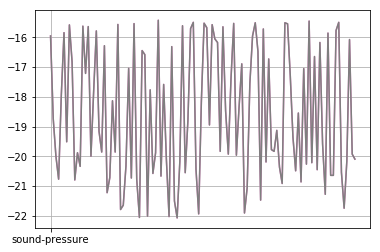

In [72]:
plt.plot(FREQ, DBRA)
plt.grid()
plt.show()

In [ ]:
# code validation

In [ ]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N / 2] * X_odd,
                               X_even + factor[N / 2:] * X_odd])

In [ ]:
T_test = 10  # Duration in seconds
f0_test = 100  # Fundamental frequency
Fs_test = 100000  # Sampling frequency

# Time domain signal
t_test = np.arange(0, T_test*Fs_test)/Fs_test
x_test = np.sin(2*np.pi*f0_test*t_test)
N_test = x_test.size

# DFT
X_test = np.fft.fft(x_test)
X_db_test = 20*np.log10(2*np.abs(X_test)/N_test)
#f = np.fft.fftfreq(N, 1/Fs)
f_test = np.arange(0, N_test)*Fs_test/N_test

plt.plot(f_test, X_db_test)
plt.grid()
plt.show()

In [ ]:
t_test

In [ ]:
x_test

In [ ]:
X_test